In [ ]:
loveskfrom google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
!pwd

/content


In [ ]:
WORKING_PATH = '/content/drive/MyDrive/NLP'

In [ ]:
%cd {WORKING_PATH}

/content/drive/MyDrive/NLP


In [ ]:
!ls

'1. Introduccion.pdf'				       'Práctica final NLP.pdf'   Soluciones
'2.Introduccion al Procesado de Lenguaje Natural.pdf'   Proyecto_final		  utils.py
 Clases						        __pycache__		  w2v_model.pkl
 Datasets					        requirements.txt


In [ ]:
!pip install unzip
!pip install -r requirements.txt

  Preparing metadata (setup.py) ... done
  Created wheel for unzip: filename=unzip-1.0.0-py3-none-any.whl size=1283 sha256=b913f4b08ecd2d7089b044f0ac3e473cfce9f3edb31b76f5d06cfe626c933312
  Stored in directory: /root/.cache/pip/wheels/3c/4d/b3/ddd83a91322fba02a91898d3b006090d1df1d3b0ad61bd8b36
Successfully built unzip
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.5/163.5 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 25.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 41.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 57.7 MB/s eta 0:00:00
  Created wheel for pyDAWG: filename=pyDAWG-1.0.1-cp311-cp311-linux_x86_64.whl size=62780 sha256=23faea61b0199532b82516aa3a90a7d95d67166df0d7fb448212d70b0adcb00e
  Stored in directory: /root/.cache/pip/wheels/b3/42/a5/2904aff781887b41600fdaf29aac

In [ ]:
import pandas as pd  # Importa pandas

df = pd.read_json('./Proyecto_final/All_Beauty_5.json', lines=True)

# Vemos primeras filas
print(df.head())


   overall  verified   reviewTime      reviewerID        asin  \
0        5      True   09 1, 2016  A3CIUOJXQ5VDQ2  B0000530HU   
1        5      True  11 14, 2013  A3H7T87S984REU  B0000530HU   
2        1      True  08 18, 2013  A3J034YH7UG4KT  B0000530HU   
3        5     False   05 3, 2011  A2UEO5XR3598GI  B0000530HU   
4        5      True   05 6, 2011  A3SFRT223XXWF7  B00006L9LC   

                                               style     reviewerName  \
0  {'Size:': ' 7.0 oz', 'Flavor:': ' Classic Ice ...         Shelly F   
1  {'Size:': ' 7.0 oz', 'Flavor:': ' Classic Ice ...     houserules18   
2  {'Size:': ' 7.0 oz', 'Flavor:': ' Classic Ice ...             Adam   
3  {'Size:': ' 7.0 oz', 'Flavor:': ' Classic Ice ...           Rich K   
4                          {'Size:': ' 200ml/6.7oz'}  C. C. Christian   

                                          reviewText  \
0                   As advertised. Reasonably priced   
1  Like the oder and the feel when I put it on my...   
2 

In [ ]:
#Ver las columnas
print(df.columns)

Index(['overall', 'verified', 'reviewTime', 'reviewerID', 'asin', 'style',
       'reviewerName', 'reviewText', 'summary', 'unixReviewTime', 'vote',
       'image'],
      dtype='object')


In [ ]:
#Informacion general
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5269 entries, 0 to 5268
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   overall         5269 non-null   int64 
 1   verified        5269 non-null   bool  
 2   reviewTime      5269 non-null   object
 3   reviewerID      5269 non-null   object
 4   asin            5269 non-null   object
 5   style           4624 non-null   object
 6   reviewerName    5269 non-null   object
 7   reviewText      5264 non-null   object
 8   summary         5264 non-null   object
 9   unixReviewTime  5269 non-null   int64 
 10  vote            552 non-null    object
 11  image           98 non-null     object
dtypes: bool(1), int64(2), object(9)
memory usage: 458.1+ KB
None


In [ ]:
#Estadisticas descriptivas para las columnas númericas
print(df.describe())

           overall  unixReviewTime
count  5269.000000    5.269000e+03
mean      4.771873    1.441506e+09
std       0.743204    5.473127e+07
min       1.000000    1.095725e+09
25%       5.000000    1.407024e+09
50%       5.000000    1.445645e+09
75%       5.000000    1.481674e+09
max       5.000000    1.534982e+09


In [ ]:
df.shape

(5269, 12)

In [ ]:
df[df.isna().any(axis=1)]
df.isna().sum()

,0
overall,0
verified,0
reviewTime,0
reviewerID,0
asin,0
style,645
reviewerName,0
reviewText,5
summary,5
unixReviewTime,0


In [ ]:
#Mi análisis se va a basar en la columna reviewTest
# Al tener solo 5 valores nan en ReviewTest, decide elimar esas columnas, no creo que afecte a mi analisis
#Elimino las finlas con NaN en 'reviewTest'
df.dropna(subset=['reviewText'], inplace=True)

In [ ]:
df['reviewText'][87]

'Love this product. Cleans hair quickly and leaves hair soft.'

In [ ]:
#---- Análisis Exploratorio -----

In [ ]:
#Cardinalidad del vocabulario del vocabulario de la columna 'reviewTest', que contiene los textos de review
def cardinalidad_vocabulario(df):

  #uno los textos en un solo string y los convierte en minusculas
  textos = ' '.join(df['reviewText']).lower()

  #Tokenizar el texto con split()(separa por espacios)
  tokens = textos.split()

  #Crear un conjunto set para eliminar los duplicados
  vocabulario = set(tokens)

  #Devuelve el tamaño del conjunto(la cardinalidad)
  return len(vocabulario)

cardinalidad = cardinalidad_vocabulario(df)
print(f'La cardinalidad del vocabulario es: {cardinalidad}')

La cardinalidad del vocabulario es: 9234


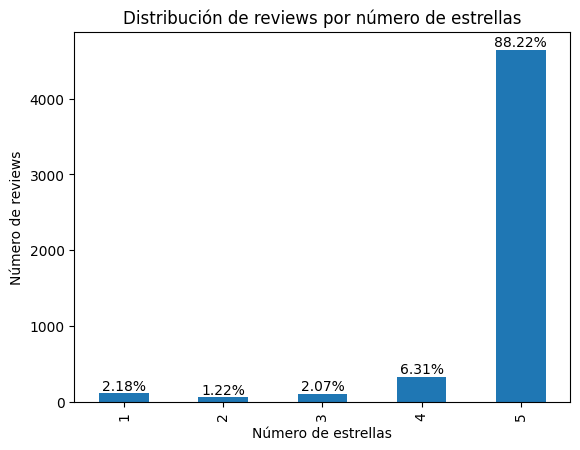

In [ ]:
#Distribución de reviews por número de estrellas
#Cuantas reseñas hay por cada calificación(1 a 5 estrellas), uso la columna overall
##########import matplotlib.pyplot as plt
def distribucion_estrellas(df):
  #Cuenta las calificaciones y las ordena
  distribucion = df['overall'].value_counts().sort_index()
  #Gráfica la distribución en un gráfica de barras
  distribucion.plot(kind='bar')

  plt.xlabel('Número de estrellas')
  plt.ylabel('Número de reviews')
  plt.title('Distribución de reviews por número de estrellas')

  # Añado etiquetas de porcentaje
  for i, valor in enumerate(distribucion):
    plt.text(i, valor, f'{valor/len(df)*100:.2f}%', ha='center', va='bottom')
  plt.show()

distribucion_estrellas(df)

sentimiento
positiva    4976
negativa     288
Name: count, dtype: int64


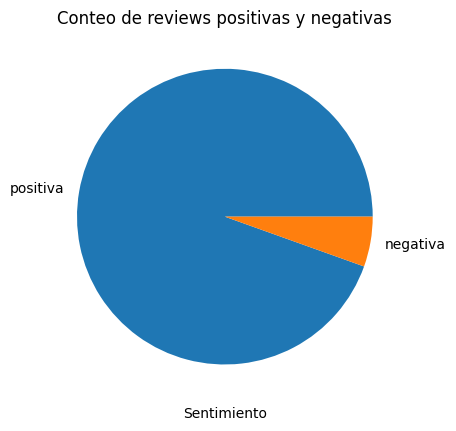

In [ ]:
#Numero de review positivas y negativas
#Reseñas positivas se consideran con más de 3 estrellas y las negativas con 3 0 menos
def conteo_review(df):
  #La columna 'overall' que contiene las calificaciones
  #Creo una nueva columna de sentimiento
  df['sentimiento'] = df['overall'].apply(lambda x: 'positiva' if x > 3 else 'negativa')
  #Cuenta las reseñas positivas y negativas
  conteo = df['sentimiento'].value_counts()
  print(conteo)
  conteo.plot(kind='pie')
  plt.xlabel('Sentimiento')
  plt.ylabel('')
  plt.title('Conteo de reviews positivas y negativas')
  plt.show()

conteo_review(df)

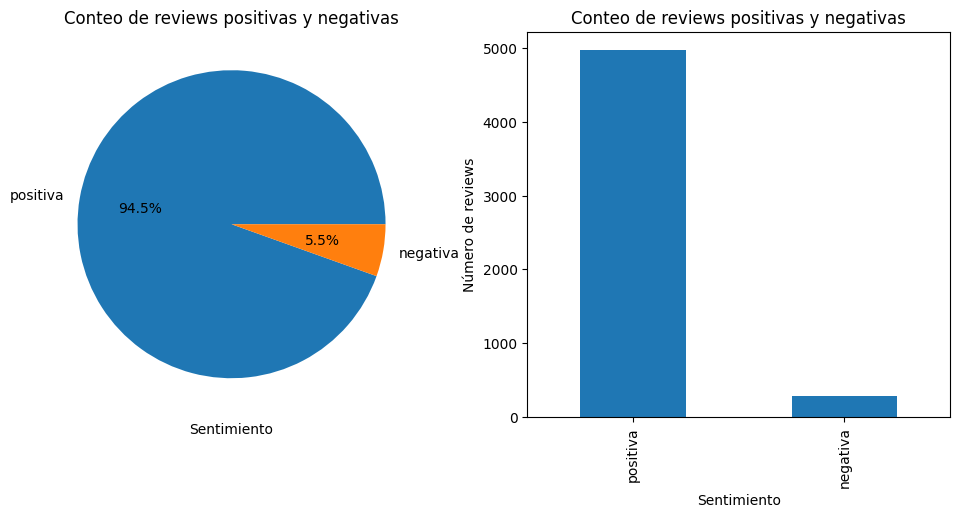

In [ ]:
def conteo_review(df):
    df['sentimiento'] = df['overall'].apply(lambda x: 'positiva' if x > 3 else 'negativa')
    conteo = df['sentimiento'].value_counts()
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    conteo.plot(kind='pie', autopct='%1.1f%%')
    plt.xlabel('Sentimiento')
    plt.ylabel('')
    plt.title('Conteo de reviews positivas y negativas')
    plt.subplot(1, 2, 2)
    conteo.plot(kind='bar')
    plt.xlabel('Sentimiento')
    plt.ylabel('Número de reviews')
    plt.title('Conteo de reviews positivas y negativas')
    plt.show()

conteo_review(df)


In [ ]:
#N-grams más frecuentes
#Cálculo los bigramas(n=2) y trigramas (n=3)
from collections import Counter
from nltk import ngrams
import nltk

def n_gramas_frecuentes(df, n= 2, top_k=10):
  #con la columna 'reviesTest' que contiene los textos
  #n: longuitud de los n_gramas
  #top_k: número de n_gramas mas frecuentes a mostrar
  #Une todos los textos
  textos = ' '.join(df['reviewText']).lower()
  #Tokeniza
  tokens = textos.split()
  #Crea los n-gramas
  n_gramas = nltk.ngrams(tokens, n)
  #Cuenta la frecuencia de cada n-gramas
  frecuencia = Counter(n_gramas)
  #Obtengo los n-gramas mas comunes
  frecuencia_mas_comunes = frecuencia.most_common(top_k)
  print(f'los {top_k} {n}-gramas mas frecuentes son:\n')
  for n_grama, conteo in frecuencia_mas_comunes:
    print(f'{n_grama}: {conteo}')
  #return frecuencia_mas_comunes

n_gramas_frecuentes(df, n=2, top_k=20) #bigramas
n_gramas_frecuentes(df, n=3, top_k=20) #trigramas



los 20 2-gramas mas frecuentes son:

('i', 'have'): 736
('this', 'is'): 687
('of', 'the'): 582
('it', 'is'): 580
('i', 'love'): 579
('my', 'hair'): 559
('is', 'a'): 537
('in', 'the'): 510
('love', 'this'): 435
('this', 'product'): 419
('and', 'i'): 387
('i', 'was'): 350
('and', 'the'): 328
('love', 'the'): 309
('i', 'am'): 293
('is', 'the'): 289
('my', 'skin'): 286
('and', 'it'): 284
('for', 'a'): 265
('for', 'the'): 253
los 20 3-gramas mas frecuentes son:

('this', 'is', 'a'): 216
('i', 'love', 'this'): 161
('i', 'love', 'the'): 155
('this', 'is', 'the'): 123
('a', 'lot', 'of'): 115
('i', 'have', 'been'): 109
('i', 'use', 'it'): 100
('is', 'a', 'great'): 87
('pre', 'de', 'provence'): 87
('it', 'is', 'a'): 86
('i', 'have', 'used'): 82
('hard', 'to', 'find'): 78
('i', 'would', 'recommend'): 73
('this', 'product', 'is'): 71
('my', 'hair', 'is'): 70
('have', 'been', 'using'): 69
('one', 'of', 'the'): 67
('this', 'is', 'my'): 66
('it', 'makes', 'my'): 64
('to', 'find', 'it'): 63


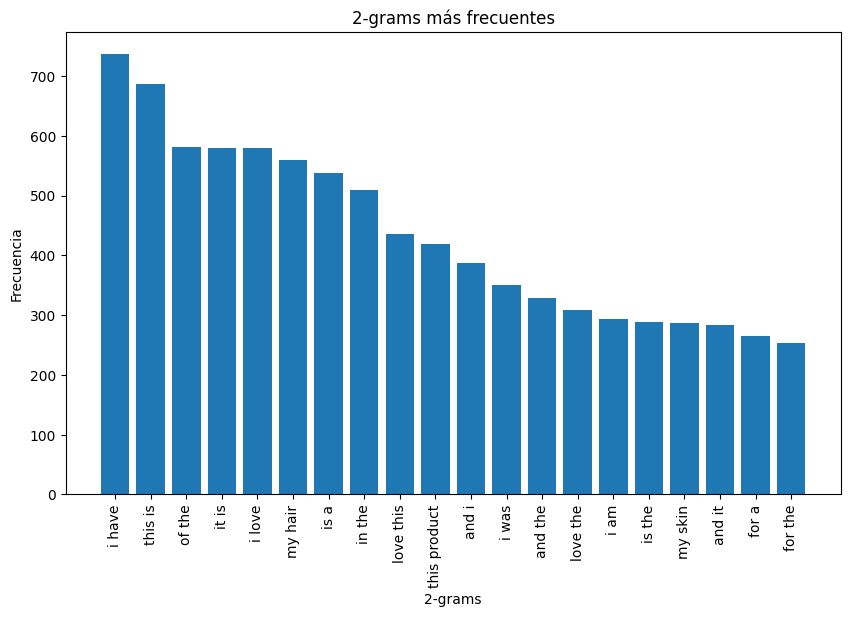

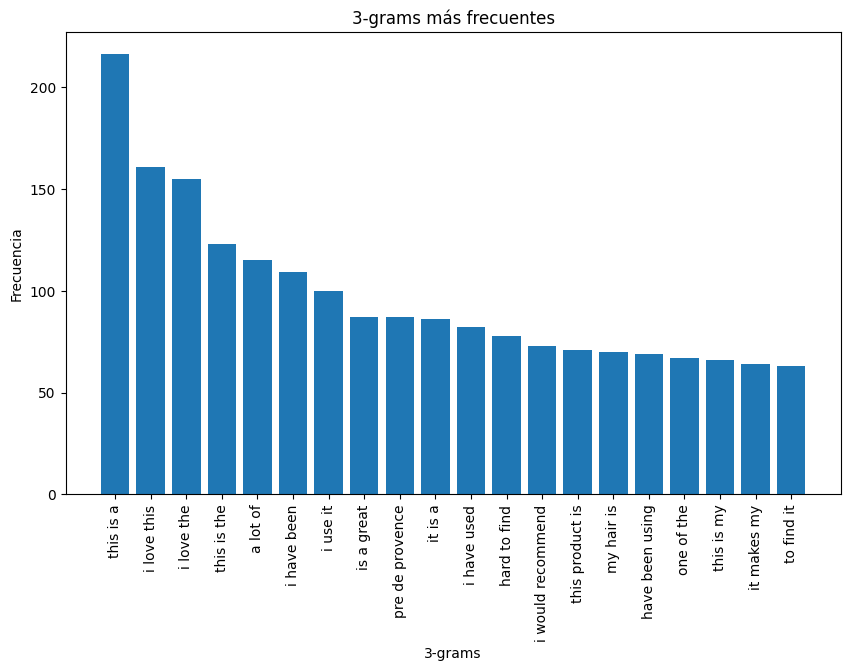

In [ ]:
def n_gramas_frecuentes(df, n=2, top_k=10):
    textos = ' '.join(df['reviewText']).lower()
    tokens = textos.split()
    n_gramas = nltk.ngrams(tokens, n)
    frecuencia = Counter(n_gramas)
    frecuencia_mas_comunes = frecuencia.most_common(top_k)
    n_gramas, frecuencias = zip(*frecuencia_mas_comunes)
    n_gramas = [' '.join(ng) for ng in n_gramas]
    plt.figure(figsize=(10, 6))
    plt.bar(n_gramas, frecuencias)
    plt.xticks(rotation=90)
    plt.xlabel(f'{n}-grams')
    plt.ylabel('Frecuencia')
    plt.title(f'{n}-grams más frecuentes')
    plt.show()

n_gramas_frecuentes(df, n=2, top_k=20)
n_gramas_frecuentes(df, n=3, top_k=20)


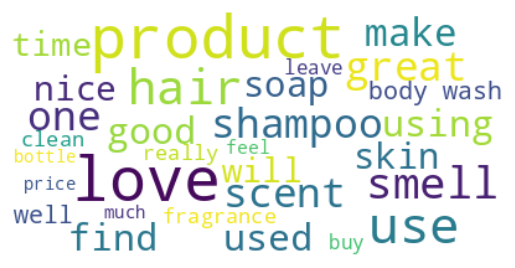

In [ ]:
#Nubes de palabras, con las palabras mas frecuentes
from wordcloud import WordCloud

def nube_palabras(df):
  textos = ' '.join(df['reviewText']).lower()
  #Creo nubes de palabras
  wordcloud = WordCloud(max_font_size=50, max_words=30, background_color='white').generate(textos)
  plt.figure()
  #Muestro la nube de palabras
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.show()

nube_palabras(df)

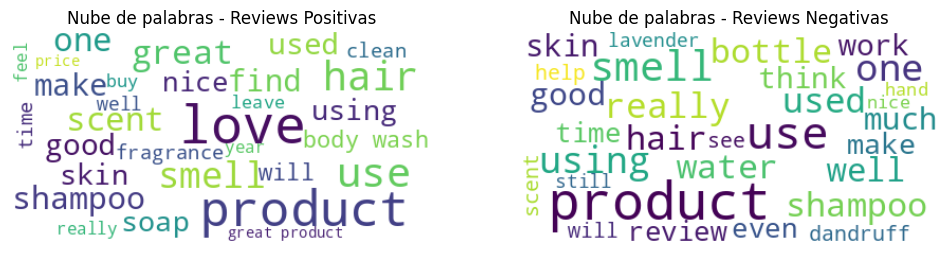

In [ ]:
from wordcloud import WordCloud
#Muesto dos nubes, una con las nubes de sentimiento positivo y otro negativo
def nube_palabras_separadas(df):
    textos_positivos = ' '.join(df[df['sentimiento'] == 'positiva']['reviewText']).lower()
    textos_negativos = ' '.join(df[df['sentimiento'] == 'negativa']['reviewText']).lower()

    wordcloud_positivos = WordCloud(max_font_size=50, max_words=30, background_color='white').generate(textos_positivos)
    wordcloud_negativos = WordCloud(max_font_size=50, max_words=30, background_color='white').generate(textos_negativos)

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(wordcloud_positivos, interpolation='bilinear')
    plt.axis('off')
    plt.title('Nube de palabras - Reviews Positivas')

    plt.subplot(1, 2, 2)
    plt.imshow(wordcloud_negativos, interpolation='bilinear')
    plt.axis('off')
    plt.title('Nube de palabras - Reviews Negativas')

    plt.show()

nube_palabras_separadas(df)


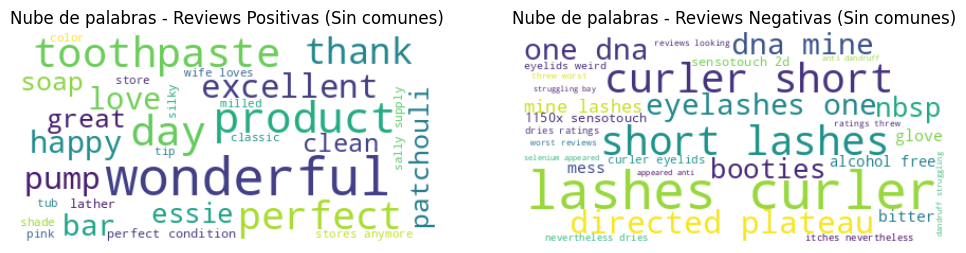

In [ ]:
from wordcloud import WordCloud
#Muestro la nubes con la palabras comunes de positivo y negativo
def nube_palabras_separadas_sin_comunes(df):
    # Crear textos separados para reviews positivas y negativas
    textos_positivos = ' '.join(df[df['sentimiento'] == 'positiva']['reviewText']).lower()
    textos_negativos = ' '.join(df[df['sentimiento'] == 'negativa']['reviewText']).lower()

    # Tokenizar y convertir a conjuntos para identificar palabras comunes
    palabras_positivas = set(textos_positivos.split())
    palabras_negativas = set(textos_negativos.split())
    palabras_comunes = palabras_positivas.intersection(palabras_negativas)

    # Filtrar palabras comunes de los textos
    textos_positivos_filtrados = ' '.join([word for word in textos_positivos.split() if word not in palabras_comunes])
    textos_negativos_filtrados = ' '.join([word for word in textos_negativos.split() if word not in palabras_comunes])

    # Generar nubes de palabras
    wordcloud_positivos = WordCloud(max_font_size=50, max_words=30, background_color='white').generate(textos_positivos_filtrados)
    wordcloud_negativos = WordCloud(max_font_size=50, max_words=30, background_color='white').generate(textos_negativos_filtrados)

    # Mostrar nubes de palabras
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(wordcloud_positivos, interpolation='bilinear')
    plt.axis('off')
    plt.title('Nube de palabras - Reviews Positivas (Sin comunes)')

    plt.subplot(1, 2, 2)
    plt.imshow(wordcloud_negativos, interpolation='bilinear')
    plt.axis('off')
    plt.title('Nube de palabras - Reviews Negativas (Sin comunes)')

    plt.show()

# Llamar a la función con tu DataFrame
nube_palabras_separadas_sin_comunes(df)


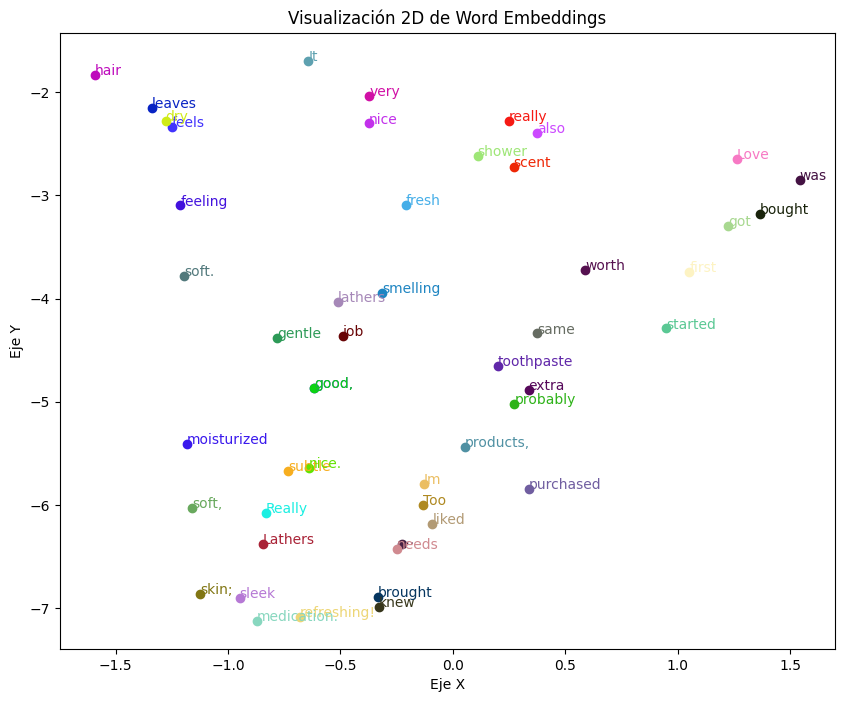

In [ ]:
from sklearn.manifold import TSNE
import gensim
import numpy as np
import matplotlib.pyplot as plt
import random
#Visuaizar los vectores de palabras
#Entreno un modelo de Word2Vec usando las reseñas y luego reduzco la dimensionalidad con t-SNE
#para proyectar las palabras en 2D
def visualizacion_word2vec(df, palabras=['good', 'bad', 'love', 'smell', 'skin']):
    # Tokenizamos los textos en la columna 'reviewText'
    textos = [texto.split() for texto in df['reviewText']]

    # Entrenamos el modelo Word2Vec
    modelo = gensim.models.Word2Vec(textos, vector_size=100, window=5, min_count=2, workers=4)

    def palabras_similares(palabra, top_n=10):
        # Devuelve las palabras más similares para una palabra dada
        try:
            return modelo.wv.most_similar(palabra, topn=top_n)
        except KeyError:
            return []

    palabras_a_visualizar = []
    #Obtengo las palabras similares
    for palabra in palabras:
        palabras_a_visualizar.extend(palabras_similares(palabra))
    #Obtengo los vectores
    vectores = [modelo.wv[palabra] for palabra, _ in palabras_a_visualizar if palabra in modelo.wv]

    #Conviert los vectores en un array
    if len(vectores) > 1:
        vectores_array = np.array(vectores)

        # Reducción de dimensionalidad con t-SNE
        tsne = TSNE(n_components=2, perplexity=min(30, len(vectores) - 1), max_iter=3000, random_state=30)
        vectores_2d = tsne.fit_transform(vectores_array)

        plt.figure(figsize=(10, 8))

        # Generar colores aleatorios para cada palabra
        colores = ["#" + ''.join([random.choice('0123456789ABCDEF') for j in range(6)]) for i in range(len(vectores_2d))]

        for i, (palabra, _) in enumerate(palabras_a_visualizar):
            if palabra in modelo.wv:
                plt.scatter(vectores_2d[i, 0], vectores_2d[i, 1], color=colores[i])
                plt.annotate(palabra, (vectores_2d[i, 0], vectores_2d[i, 1]), color=colores[i])

        plt.title('Visualización 2D de Word Embeddings')
        plt.xlabel('Eje X')
        plt.ylabel('Eje Y')
        plt.show()
    else:
        print("No hay suficientes palabras para visualizar para algunas de las palabras seleccionadas.")

# Llamar a la función con tu DataFrame
visualizacion_word2vec(df)


In [ ]:
import gensim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import plotly.express as px
from transformers import BertTokenizer, BertModel
import torch

# Función para visualizar embeddings (común a todos los modelos)
def visualizar_embeddings(vectores_2d, palabras_a_visualizar, titulo):
    fig = px.scatter(x=vectores_2d[:, 0], y=vectores_2d[:, 1], text=palabras_a_visualizar, title=titulo)
    fig.update_traces(marker_size=8)
    fig.show()

# 1. Word2Vec
def visualizacion_word2vec(df, palabras=['good', 'bad', 'love', 'smell', 'skin']):
    textos = [texto.split() for texto in df['reviewText']]
    modelo = gensim.models.Word2Vec(textos, vector_size=100, window=5, min_count=2, workers=4)

    palabras_a_visualizar = []
    for palabra in palabras:
        try:
            palabras_a_visualizar.extend([p[0] for p in modelo.wv.most_similar(palabra, topn=10)])
        except KeyError:
            pass

    vectores = [modelo.wv[palabra] for palabra in palabras_a_visualizar if palabra in modelo.wv]
    vectores_array = np.array(vectores)

    tsne = TSNE(n_components=2, perplexity=min(30, len(vectores) - 1), max_iter=3000, random_state=30)
    vectores_2d = tsne.fit_transform(vectores_array)

    visualizar_embeddings(vectores_2d, palabras_a_visualizar, 'Visualización 2D de Word Embeddings con Word2Vec')

# 2. FastText
def visualizacion_fasttext(df, palabras=['good', 'bad', 'love', 'smell', 'skin']):
    textos = [texto.split() for texto in df['reviewText']]
    modelo = gensim.models.FastText(textos, vector_size=100, window=5, min_count=2, workers=4)

    palabras_a_visualizar = []
    for palabra in palabras:
        try:
            palabras_a_visualizar.extend([p[0] for p in modelo.wv.most_similar(palabra, topn=10)])
        except KeyError:
            pass

    vectores = [modelo.wv[palabra] for palabra in palabras_a_visualizar if palabra in modelo.wv]
    vectores_array = np.array(vectores)

    tsne = TSNE(n_components=2, perplexity=min(30, len(vectores) - 1), max_iter=3000, random_state=30)
    vectores_2d = tsne.fit_transform(vectores_array)

    visualizar_embeddings(vectores_2d, palabras_a_visualizar, 'Visualización 2D de Word Embeddings con FastText')

# 3. BERT
def visualizacion_bert(df, palabras=['good', 'bad', 'love', 'smell', 'skin']):
    tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
    modelo_bert = BertModel.from_pretrained('bert-base-uncased')

    palabras_a_vectorizar = []
    for palabra in palabras:
        palabras_a_vectorizar.append(palabra)

    vectores = []
    for palabra in palabras_a_vectorizar:
        tokens = tokenizer.encode(palabra, add_special_tokens=True)
        with torch.no_grad():
            outputs = modelo_bert(torch.tensor([tokens]))
            embeddings = outputs[0][0][1:-1].mean(dim=0)
        vectores.append(embeddings.numpy())

    vectores_array = np.array(vectores)

    tsne = TSNE(n_components=2, perplexity=min(30, len(vectores) - 1), max_iter=3000, random_state=30)
    vectores_2d = tsne.fit_transform(vectores_array)

    visualizar_embeddings(vectores_2d, palabras_a_vectorizar, 'Visualización 2D de Word Embeddings con BERT')

# Ejemplo de uso (reemplaza 'df' con tu DataFrame)
#visualizacion_word2vec(df)
visualizacion_fasttext(df)
#visualizacion_bert(df)

('the', 'i', 'and', 'it', 'a', 'this', 'to', 'is', 'my', 'of', 'for', 'in', 'that', 'but', 'love', 'have', 'with', 'on', 'not', 'as')


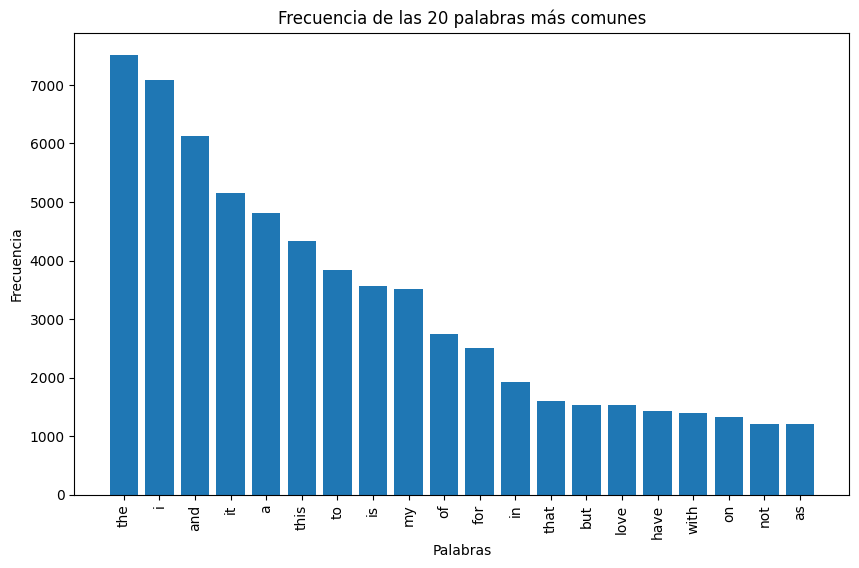

In [ ]:
#Analisis de frecuencia con las palabras mas comunes
#Visualización
from collections import Counter
import matplotlib.pyplot as plt

def frecuencia_palabras(df):
    # Unir los textos en un solo string
    textos = ' '.join(df['reviewText']).lower()
    # Tokenizar el texto con split()
    tokens = textos.split()
    # Contar la frecuencia de cada palabra
    frecuencia = Counter(tokens)
    # Obtener las 20 palabras más comunes
    palabras_comunes = frecuencia.most_common(20)
    # Desempaquetar las palabras y las frecuencias
    palabras, frecuencias = zip(*palabras_comunes)
    print(palabras)
    # Graficar
    plt.figure(figsize=(10, 6))
    plt.bar(palabras, frecuencias)
    plt.xticks(rotation=90)
    plt.xlabel('Palabras')
    plt.ylabel('Frecuencia')
    plt.title('Frecuencia de las 20 palabras más comunes')
    plt.show()

frecuencia_palabras(df)


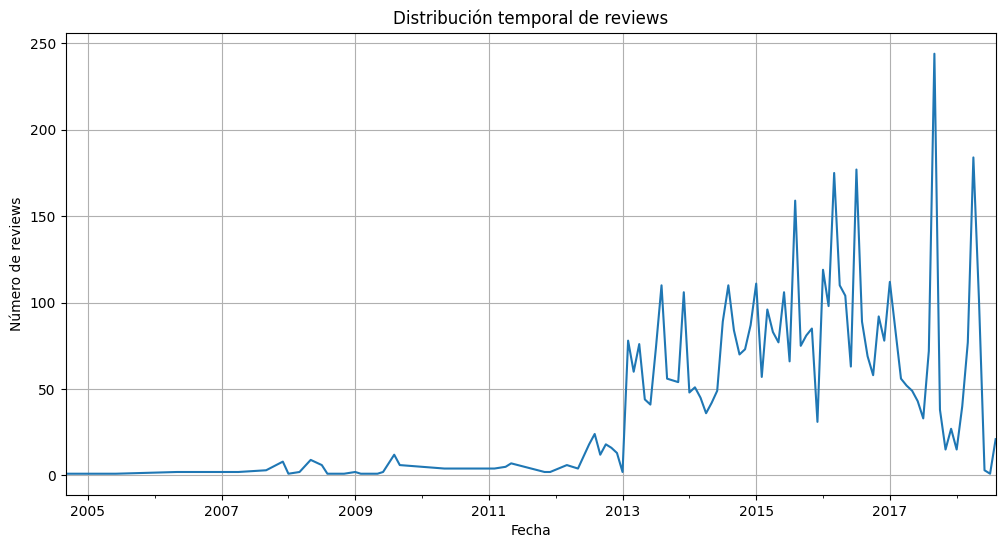

In [ ]:
#tendencias temporales
import pandas as pd
import matplotlib.pyplot as plt

# Me asegur de que 'reviewTime' está en formato de fecha
df['reviewTime'] = pd.to_datetime(df['reviewTime'])

def distribucion_temporal_reviews(df):
    # Agrupar por mes y contar las reviews
    df['year_month'] = df['reviewTime'].dt.to_period('M')
    reviews_por_mes = df.groupby('year_month').size()

    # Graficar la distribución temporal
    plt.figure(figsize=(12, 6))
    reviews_por_mes.plot(kind='line')
    plt.xlabel('Fecha')
    plt.ylabel('Número de reviews')
    plt.title('Distribución temporal de reviews')
    plt.grid(True)
    plt.show()

distribucion_temporal_reviews(df)


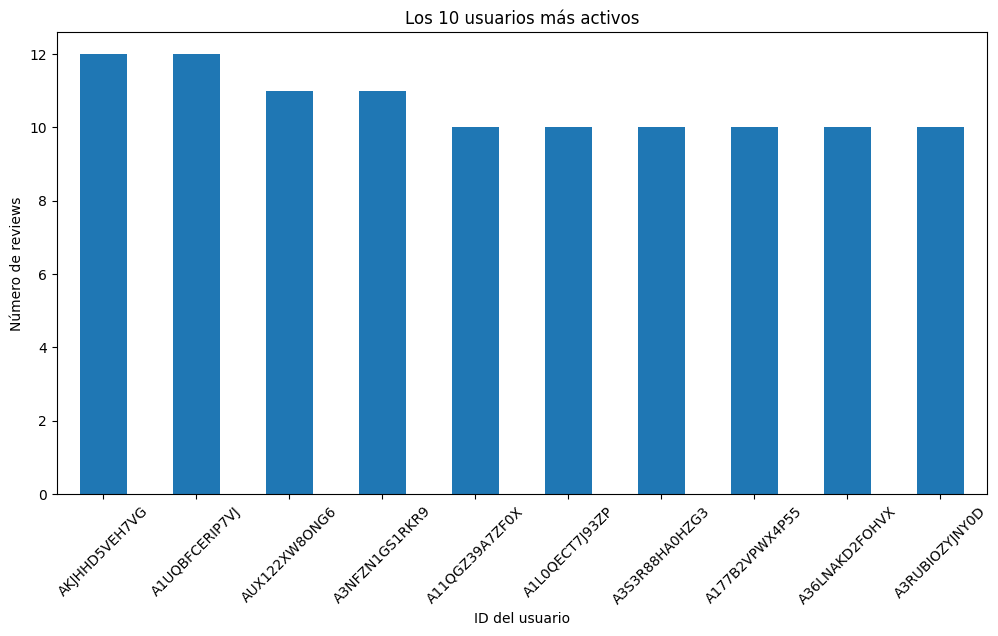

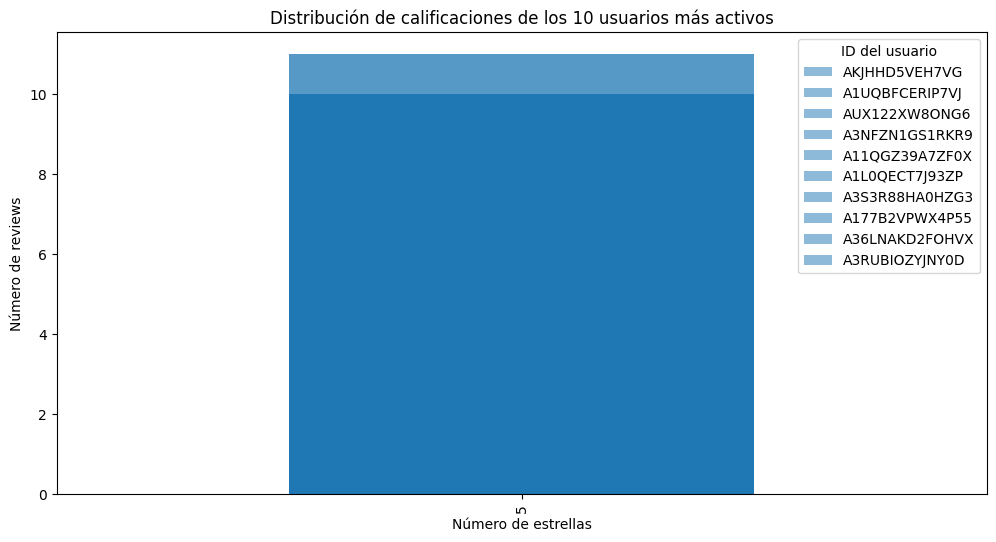

In [ ]:
#Usuarios activos
import matplotlib.pyplot as plt

def usuarios_activos(df, top_n=10):
    # Contar el número de reviews por usuario
    reviews_por_usuario = df['reviewerID'].value_counts().head(top_n)

    # Graficar los usuarios más activos
    plt.figure(figsize=(12, 6))
    reviews_por_usuario.plot(kind='bar')
    plt.xlabel('ID del usuario')
    plt.ylabel('Número de reviews')
    plt.title(f'Los {top_n} usuarios más activos')
    plt.xticks(rotation=45)
    plt.show()

    # Analizar las calificaciones de los usuarios más activos
    usuarios_mas_activos = reviews_por_usuario.index
    df_usuarios_activos = df[df['reviewerID'].isin(usuarios_mas_activos)]

    # Graficar la distribución de calificaciones de los usuarios más activos
    plt.figure(figsize=(12, 6))
    for usuario in usuarios_mas_activos:
        distribucion = df_usuarios_activos[df_usuarios_activos['reviewerID'] == usuario]['overall'].value_counts().sort_index()
        distribucion.plot(kind='bar', alpha=0.5, label=usuario)

    plt.xlabel('Número de estrellas')
    plt.ylabel('Número de reviews')
    plt.title(f'Distribución de calificaciones de los {top_n} usuarios más activos')
    plt.legend(title='ID del usuario')
    plt.show()

usuarios_activos(df, top_n=10)
